In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os

folder_path = "/content/drive/MyDrive/Ratina_data"
print(os.listdir(folder_path))


['Ratina_data', 'test.csv', 'train.csv', 'test', 'train', 'val']


In [36]:
df=pd.read_csv("/content/test.csv")
df1=pd.read_csv("/content/train.csv")

In [37]:
df.head()
df1.head()
df.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id_code  1928 non-null   object
dtypes: object(1)
memory usage: 15.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [38]:
df.describe()

,id_code
count,1928
unique,1928
top,0005cfc8afb6
freq,1


In [4]:
import pandas as pd

for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        print(f"📊 Data from {file_name}:")
        print(df.head())  # Show first 5 rows


📊 Data from test.csv:
        id_code
0  0005cfc8afb6
1  003f0afdcd15
2  006efc72b638
3  00836aaacf06
4  009245722fa4
📊 Data from train.csv:
        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


In [6]:
import os

base_dir = "/content/drive/MyDrive/Ratina_data"  # Update with your actual path
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Check directory structure
print("Train:", os.listdir(train_dir))
print("Validation:", os.listdir(val_dir))
print("Test:", os.listdir(test_dir))


Train: ['dr', 'no_dr']
Validation: ['dr', 'no_dr']
Test: ['dr', 'no_dr']


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)


batch_size = 32
img_size = (224, 224)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False



Found 10 images belonging to 2 classes.
Found 3 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


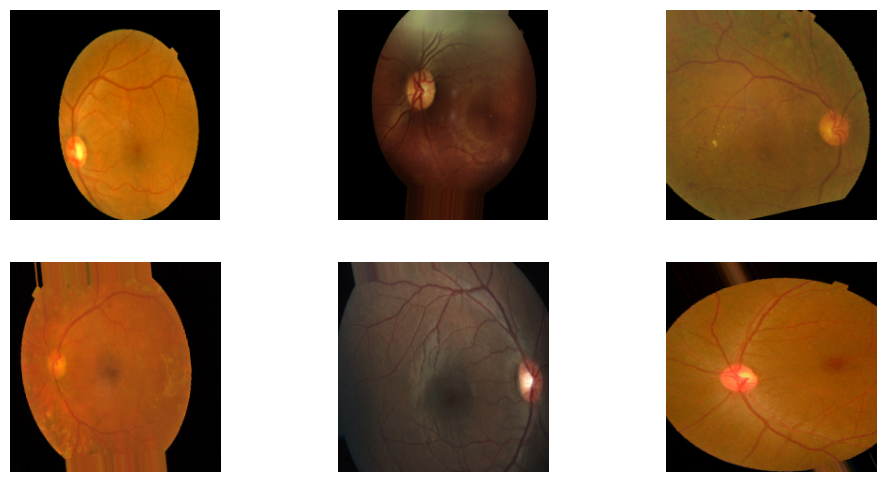

In [9]:
import matplotlib.pyplot as plt

# Get a batch of images
sample_images, sample_labels = next(train_generator)

# Display first 6 images
plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(sample_images[i])  # Images are already normalized (0 to 1)
    plt.axis('off')
plt.show()


In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [12]:
categories = ["Normal", "Diabetic_retinopathy"]

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Ensure category names match the actual folder names
categories = ["Normal", "DR"]  # Changed 'Diabetic_retinopathy' to 'DR'

def display_images(dataset_path, title, num_images=6):
    plt.figure(figsize=(12, 6))

    for i in range(num_images):
        category = random.choice(categories)
        category_path = os.path.join(dataset_path, category)

        # Check if the category directory exists before proceeding
        if os.path.exists(category_path):
            image_name = random.choice(os.listdir(category_path))
            image_path = os.path.join(category_path, image_name)
            image = load_img(image_path, target_size=(224, 224))
            image_array = img_to_array(image) / 255.0

            plt.subplot(2, 3, i + 1)
            plt.imshow(image_array)
            plt.title(f"{category}")
            plt.axis("off")
        else:
            print(f"Warning: Category directory not found: {category_path}")

    plt.suptitle(title, fontsize=16)
    plt.show()

# Display images
display_images(train_dir, "Train Dataset Samples")
display_images(val_dir, "Validation Dataset Samples")
display_images(test_dir, "Test Dataset Samples")

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [20]:
def build_cnn_model(input_shape=(224, 224, 3)):
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Convolutional Layer 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Convolutional Layer 3
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Flatten & Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Prevent overfitting

    # Output Layer (Binary Classification)
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

    # Compile Model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Build the CNN model
cnn_model = build_cnn_model()

# Model Summary
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,457 (49.36 MB)

 Trainable params: 12,939,009 (49.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [21]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [22]:
# Define dataset directories
base_dir = "/content/drive/MyDrive/Ratina_data"  # Update this path if needed
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32


In [23]:
# Data Augmentation for Training Set
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Validation and Test Set (Only Rescaling)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load Data from Directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Found 10 images belonging to 2 classes.
Found 3 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [24]:
def build_cnn_model(input_shape=(224, 224, 3)):
    model = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Reduce overfitting

        Dense(1, activation='sigmoid')  # Binary Classification
    ])

    # Compile Model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize the model
cnn_model = build_cnn_model()

# Model Summary
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,457 (49.36 MB)

 Trainable params: 12,939,009 (49.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [25]:
# Evaluate on Test Set
test_loss, test_acc = cnn_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3750 - loss: 0.6967
Test Accuracy: 0.3750


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import os


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5000 - loss: 0.8585

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.5000 - loss: 0.8585 - val_accuracy: 0.6667 - val_loss: 0.6683
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.5000 - loss: 0.7048 - val_accuracy: 0.6667 - val_loss: 0.6492
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.7000 - loss: 1.5048 - val_accuracy: 0.6667 - val_loss: 0.6506
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7000 - loss: 1.9933 - val_accuracy: 0.6667 - val_loss: 0.6535
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8000 - loss: 0.4430

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8000 - loss: 0.4430 - val_accuracy: 1.0000 - val_loss: 0.6704


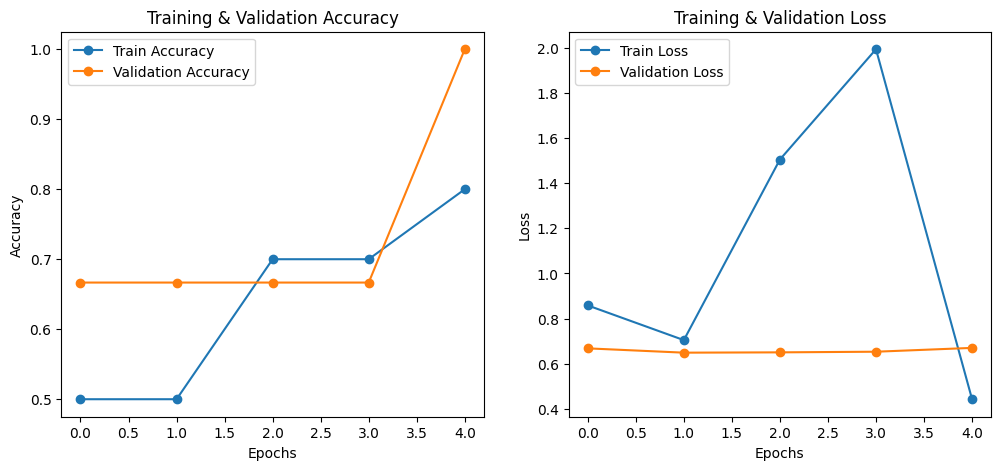

In [28]:
# Plot Training History
# Train the model and store the history
history = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
    ]
)
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title("Training & Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title("Training & Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

# Call the function
plot_training_history(history)


In [29]:
# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(test_generator)
print(f" Test Accuracy: {test_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step - accuracy: 0.5000 - loss: 0.7157
 Test Accuracy: 0.5000


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


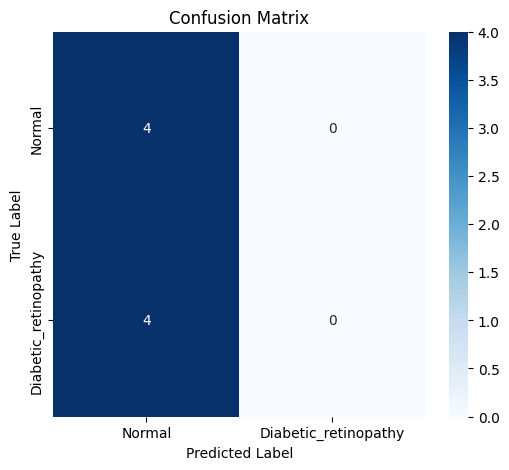

🔹 Classification Report:
                      precision    recall  f1-score   support

              Normal       0.50      1.00      0.67         4
Diabetic_retinopathy       0.00      0.00      0.00         4

            accuracy                           0.50         8
           macro avg       0.25      0.50      0.33         8
        weighted avg       0.25      0.50      0.33         8



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
# Get True Labels & Predictions
y_true = test_generator.classes  # True labels
y_pred = cnn_model.predict(test_generator)  # Raw predictions
y_pred = (y_pred > 0.5).astype(int).flatten()  # Convert to 0 or 1

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Diabetic_retinopathy'], yticklabels=['Normal', 'Diabetic_retinopathy'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("🔹 Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Normal', 'Diabetic_retinopathy']))


In [34]:
import gdown

file_id = "1qXhQmiEUquyuTvaNWaJJipS3iCjQ8fI2"
image_path = f"/content/{file_id}.jpg"  # Save path

# Download from Google Drive
gdown.download(f"https://drive.google.com/uc?id={file_id}", image_path, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1qXhQmiEUquyuTvaNWaJJipS3iCjQ8fI2
To: /content/1qXhQmiEUquyuTvaNWaJJipS3iCjQ8fI2.jpg
100%|██████████| 230k/230k [00:00<00:00, 78.6MB/s]


'/content/1qXhQmiEUquyuTvaNWaJJipS3iCjQ8fI2.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


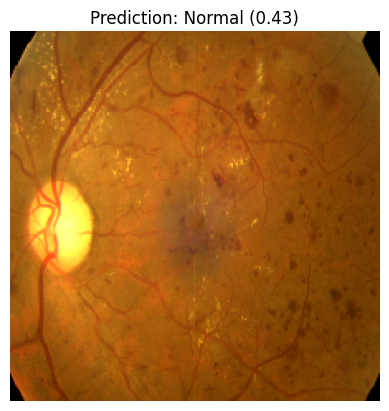

In [35]:
predict_image(image_path, cnn_model)
